# MEAN SHIFT

## Setup

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering_model import MeanShiftEvaluation
from src.models.clustering import plot_cluster_frequencies, plot_cluster_composition, plot_reconstructed_images, plot_model_means

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


[Length: 14000; Features: 784]

## Tuning

In [3]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    hyperparam_vals=[0.1, 0.3, 0.5, 0.7, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0]
)

In [4]:
mean_shift_evaluation.load_results()

Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl


In [ ]:
%%time
# mean_shift_evaluation.evaluate()

## Results

In [5]:
mean_shift_evaluation.results()

{'2': {'0.1': {'score': 0.6568509383323299,
   'n_clusters': 3,
   'time': 238.3003787},
  '0.3': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 127.04494401200009},
  '0.5': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 33.135404765999965},
  '0.7': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 23.933955089999927},
  '1.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 27.120417809999935},
  '2.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 29.252734922999934},
  '5.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 17.082216864999964},
  '10.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 18.475796326000136},
  '25.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 20.83126715100002},
  '50.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 24.105510518999836}},
 '5': {'0.1': {'score': 0.9047771065280173,
   'n_clusters': 1220,
   'time': 93

In [6]:
mean_shift_evaluation.results_bestmodels()

{'2': {'bandwidth': 0.1,
  'score': 0.6568509383323299,
  'n_clusters': 3,
  'time': 238.3003787},
 '5': {'bandwidth': 0.1,
  'score': 0.9047771065280173,
  'n_clusters': 1220,
  'time': 93.14571683200006},
 '10': {'bandwidth': 0.1,
  'score': 0.9001699917341035,
  'n_clusters': 11895,
  'time': 49.90217578900001},
 '15': {'bandwidth': 0.3,
  'score': 0.9052421601542967,
  'n_clusters': 1534,
  'time': 136.38603115199976},
 '25': {'bandwidth': 0.3,
  'score': 0.9018374475727858,
  'n_clusters': 9193,
  'time': 74.58572878899986},
 '50': {'bandwidth': 0.7,
  'score': 0.9030066637412877,
  'n_clusters': 2803,
  'time': 197.5751598869997},
 '100': {'bandwidth': 0.7,
  'score': 0.9035212923372078,
  'n_clusters': 11640,
  'time': 196.13816828200015},
 '150': {'bandwidth': 1.0,
  'score': 0.9094231016501179,
  'n_clusters': 11125,
  'time': 207.4217698350003},
 '200': {'bandwidth': 1.0,
  'score': 0.9031232843162267,
  'n_clusters': 12580,
  'time': 215.2481676110001}}

In [7]:
mean_shift_evaluation.best_model()

{'model': MeanShift(bandwidth=1.0, n_jobs=-1),
 'n_components': 150,
 'bandwidth': 1.0,
 'score': 0.9094231016501179,
 'n_clusters': 11125,
 'time': 207.4217698350003}

## Plots: Model Tuning

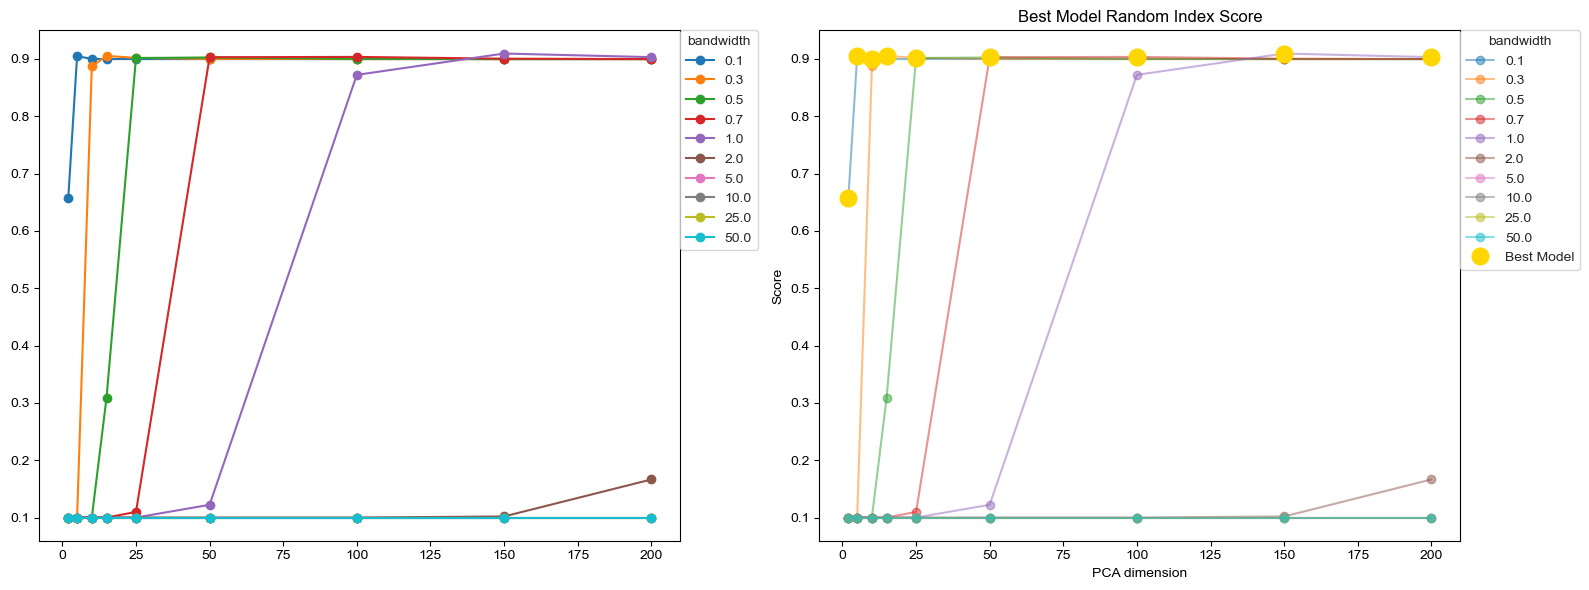

In [8]:
mean_shift_evaluation.plot_score_with_highlight(save=True)

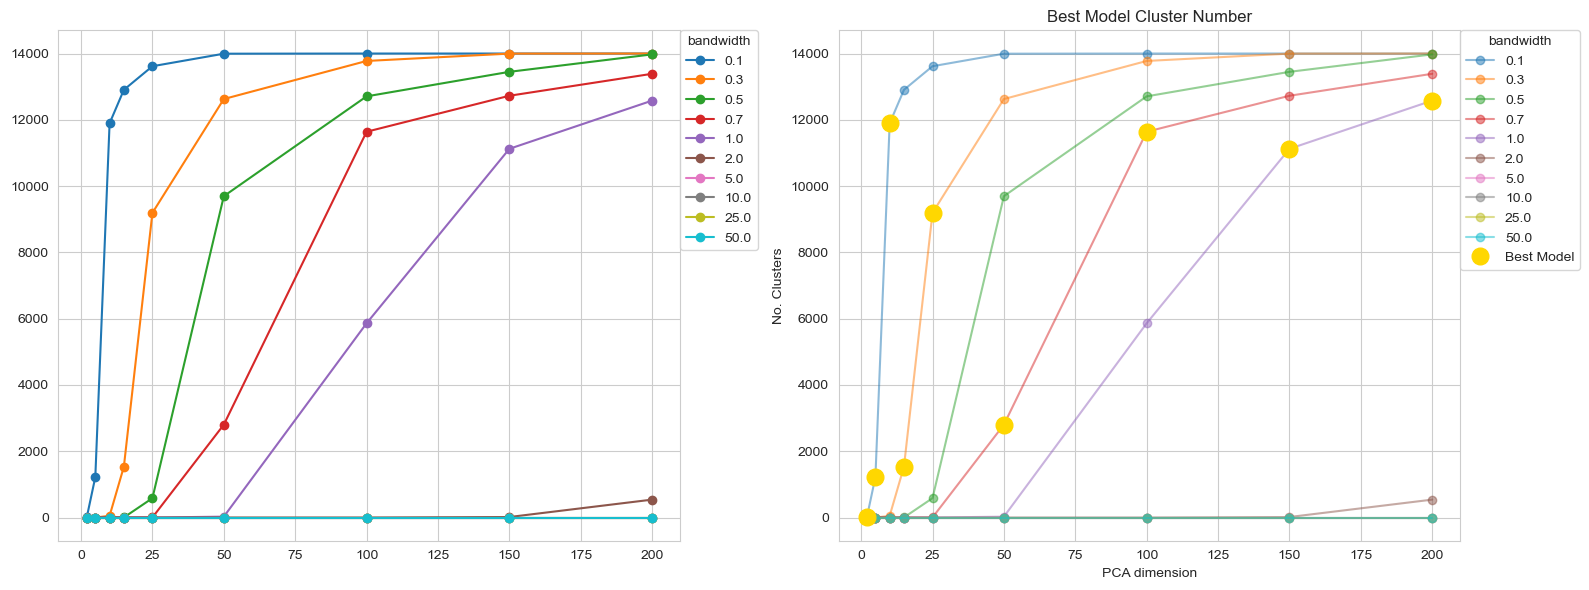

In [9]:
mean_shift_evaluation.plot_n_clusters_with_highlight(save=True)

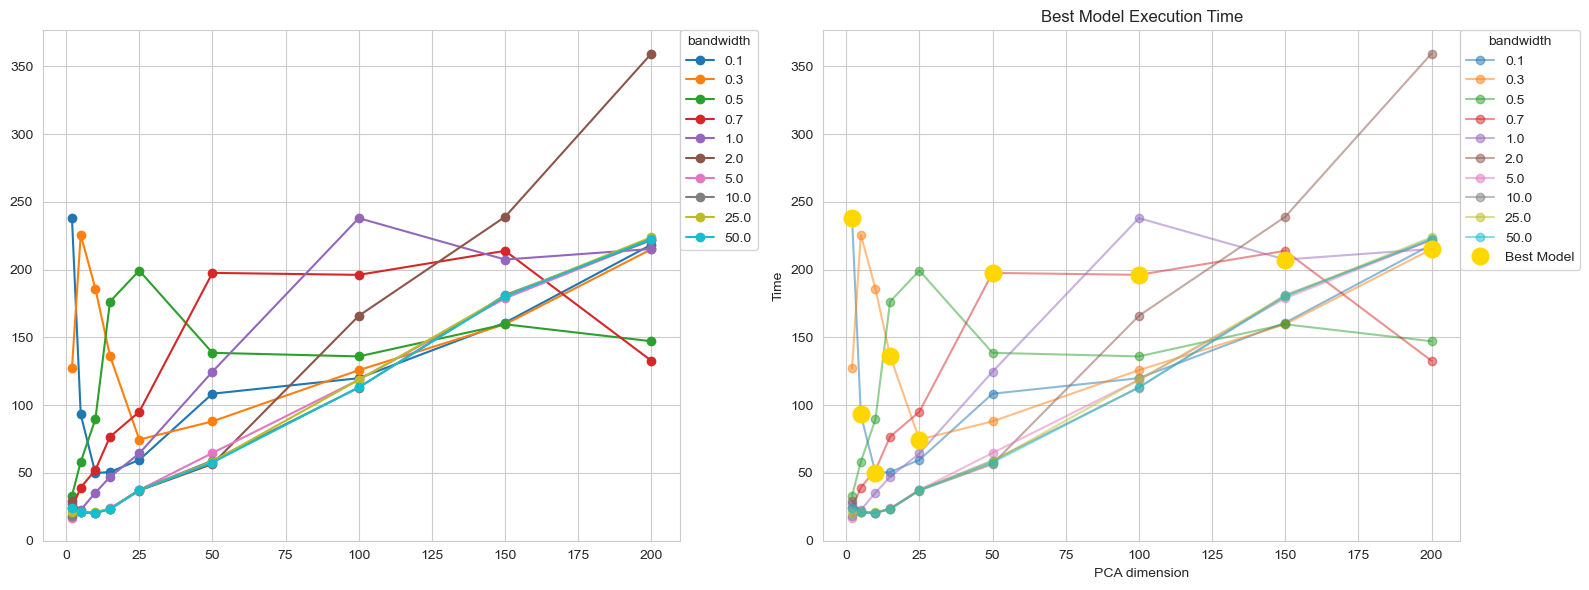

In [10]:
mean_shift_evaluation.plot_time_with_highlight(save=True)

## Plots: Best Model

In [5]:
best = mean_shift_evaluation.best_model()

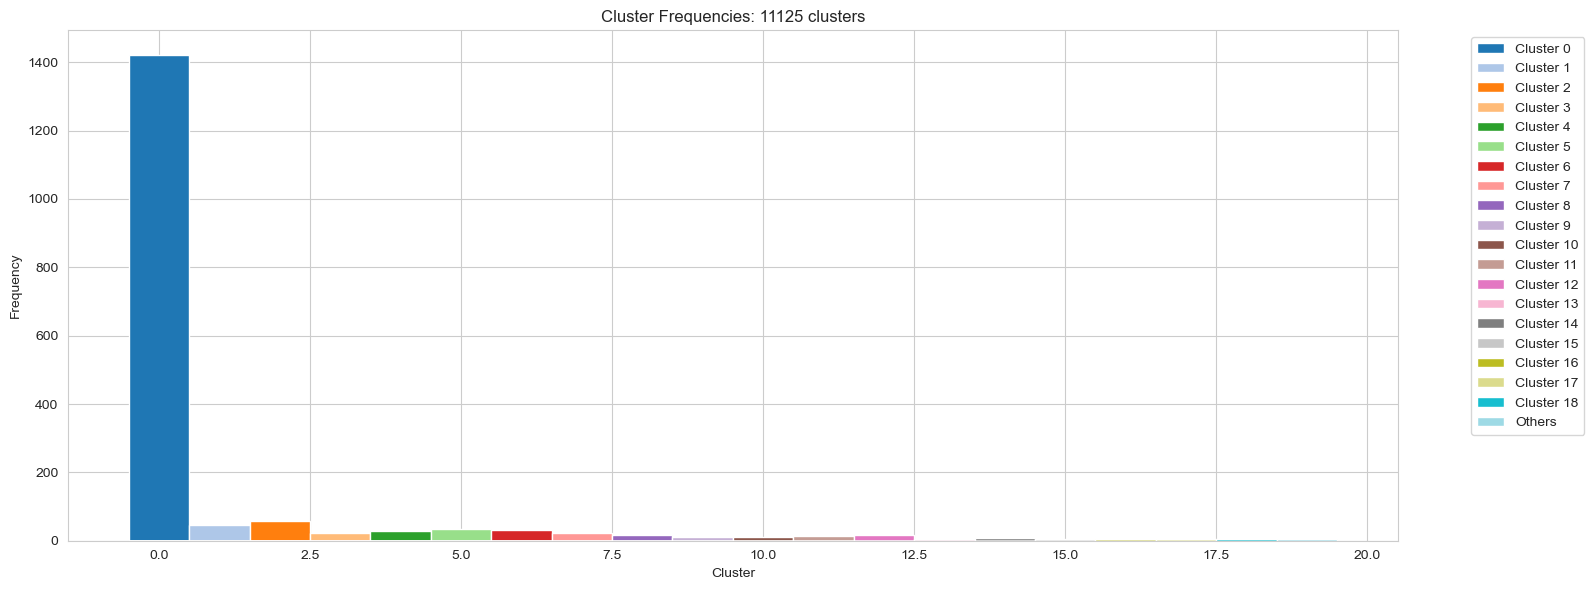

In [12]:
plot_cluster_frequencies(data=data, model_name=mean_shift_evaluation.model_name, best_model_info=best, save=True)

In [6]:
plot_cluster_composition(data=data, model_name=mean_shift_evaluation.model_name, best_model_info=best, save=True)

,Digit 0,Digit 1,Digit 2,Digit 3,Digit 4,Digit 5,Digit 6,Digit 7,Digit 8,Digit 9
Cluster,,,,,,,,,,
0,0.000,0.983,0.000,0.000,0.003,0.000,0.000,0.009,0.000,0.005
1,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.915,0.000,0.085
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
11120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
11121,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
11122,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Percentage of clusters focused on each digit:
For digit 0: 11.164%
For digit 1: 0.539%
For digit 2: 13.160%
For digit 3: 12.467%
For digit 4: 11.622%
For digit 5: 11.074%
For digit 6: 10.634%
For digit 7: 8.306%
For digit 8: 11.928%
For digit 9: 9.429%
Clusters underperforming (distributed across multiple digits): -0.324%


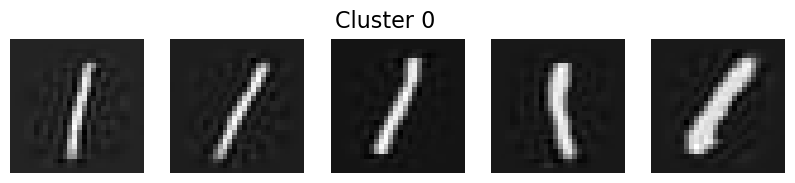

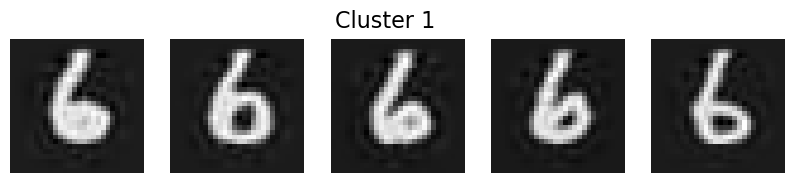

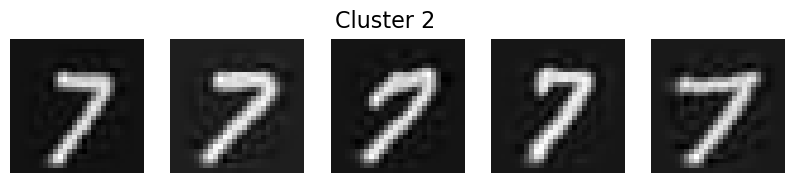

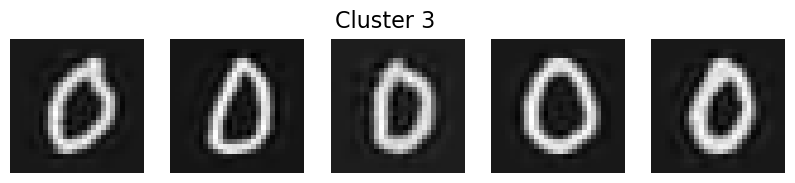

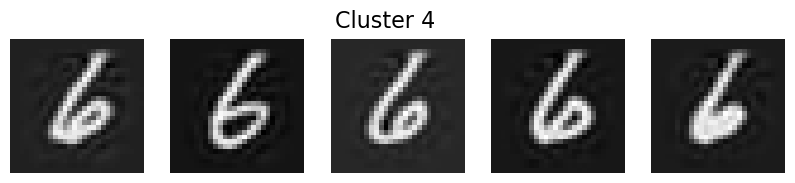

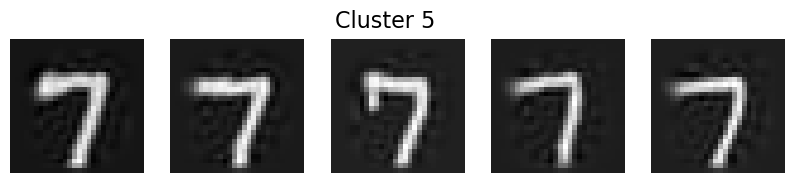

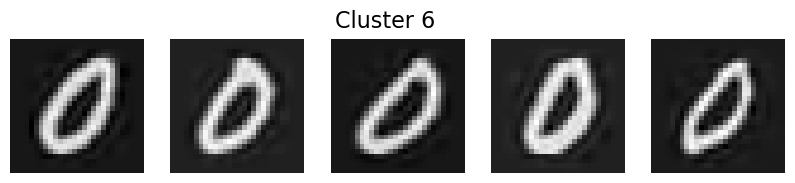

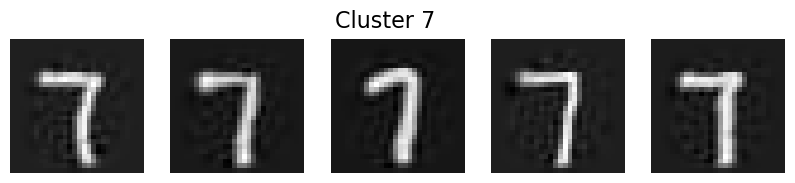

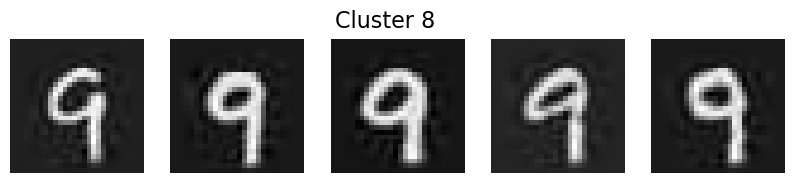

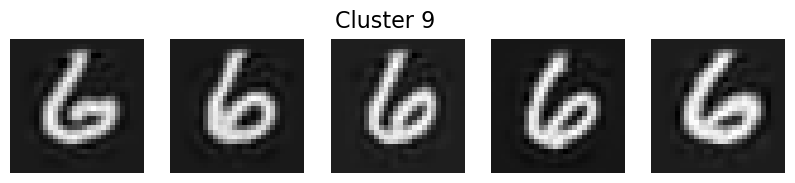

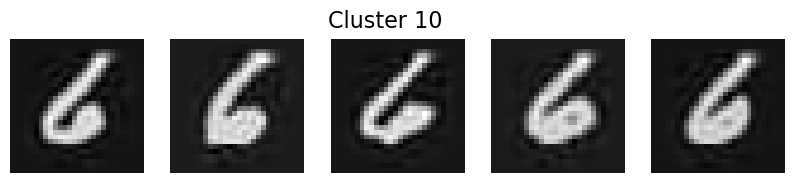

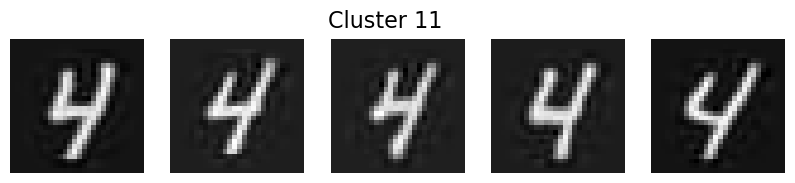

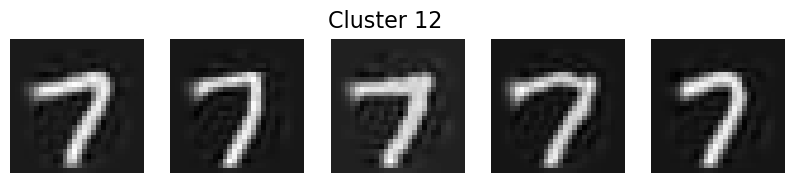

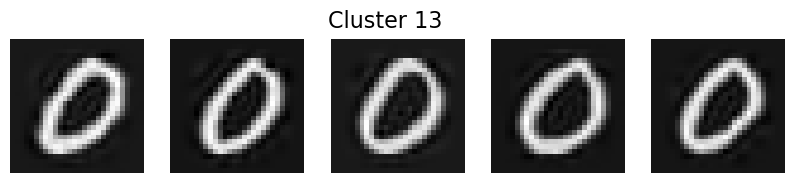

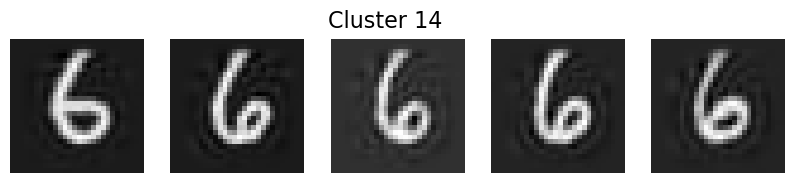

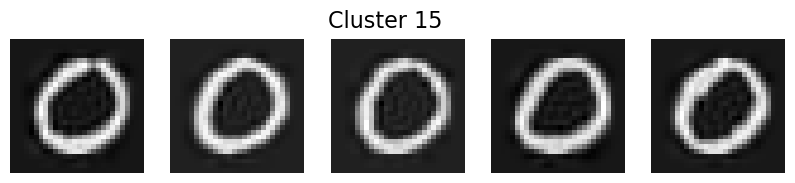

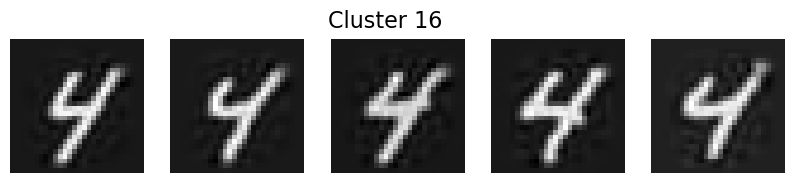

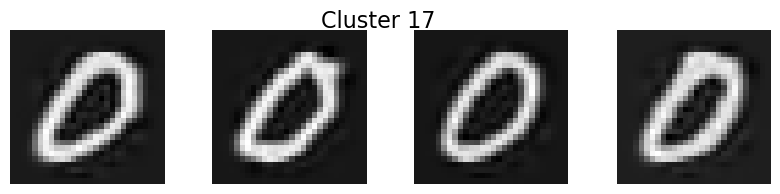

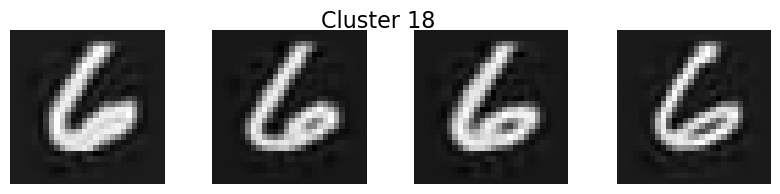

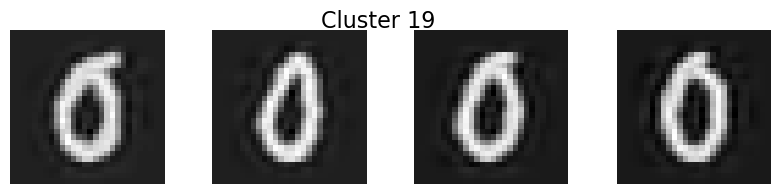

Cluster visualization limit reached. Remaining clusters won't be displayed.


In [6]:
plot_reconstructed_images(data=data, model_name=mean_shift_evaluation.model_name, best_model_info=best)

Note: Only showing the first 20 clusters. Rest are not displayed.


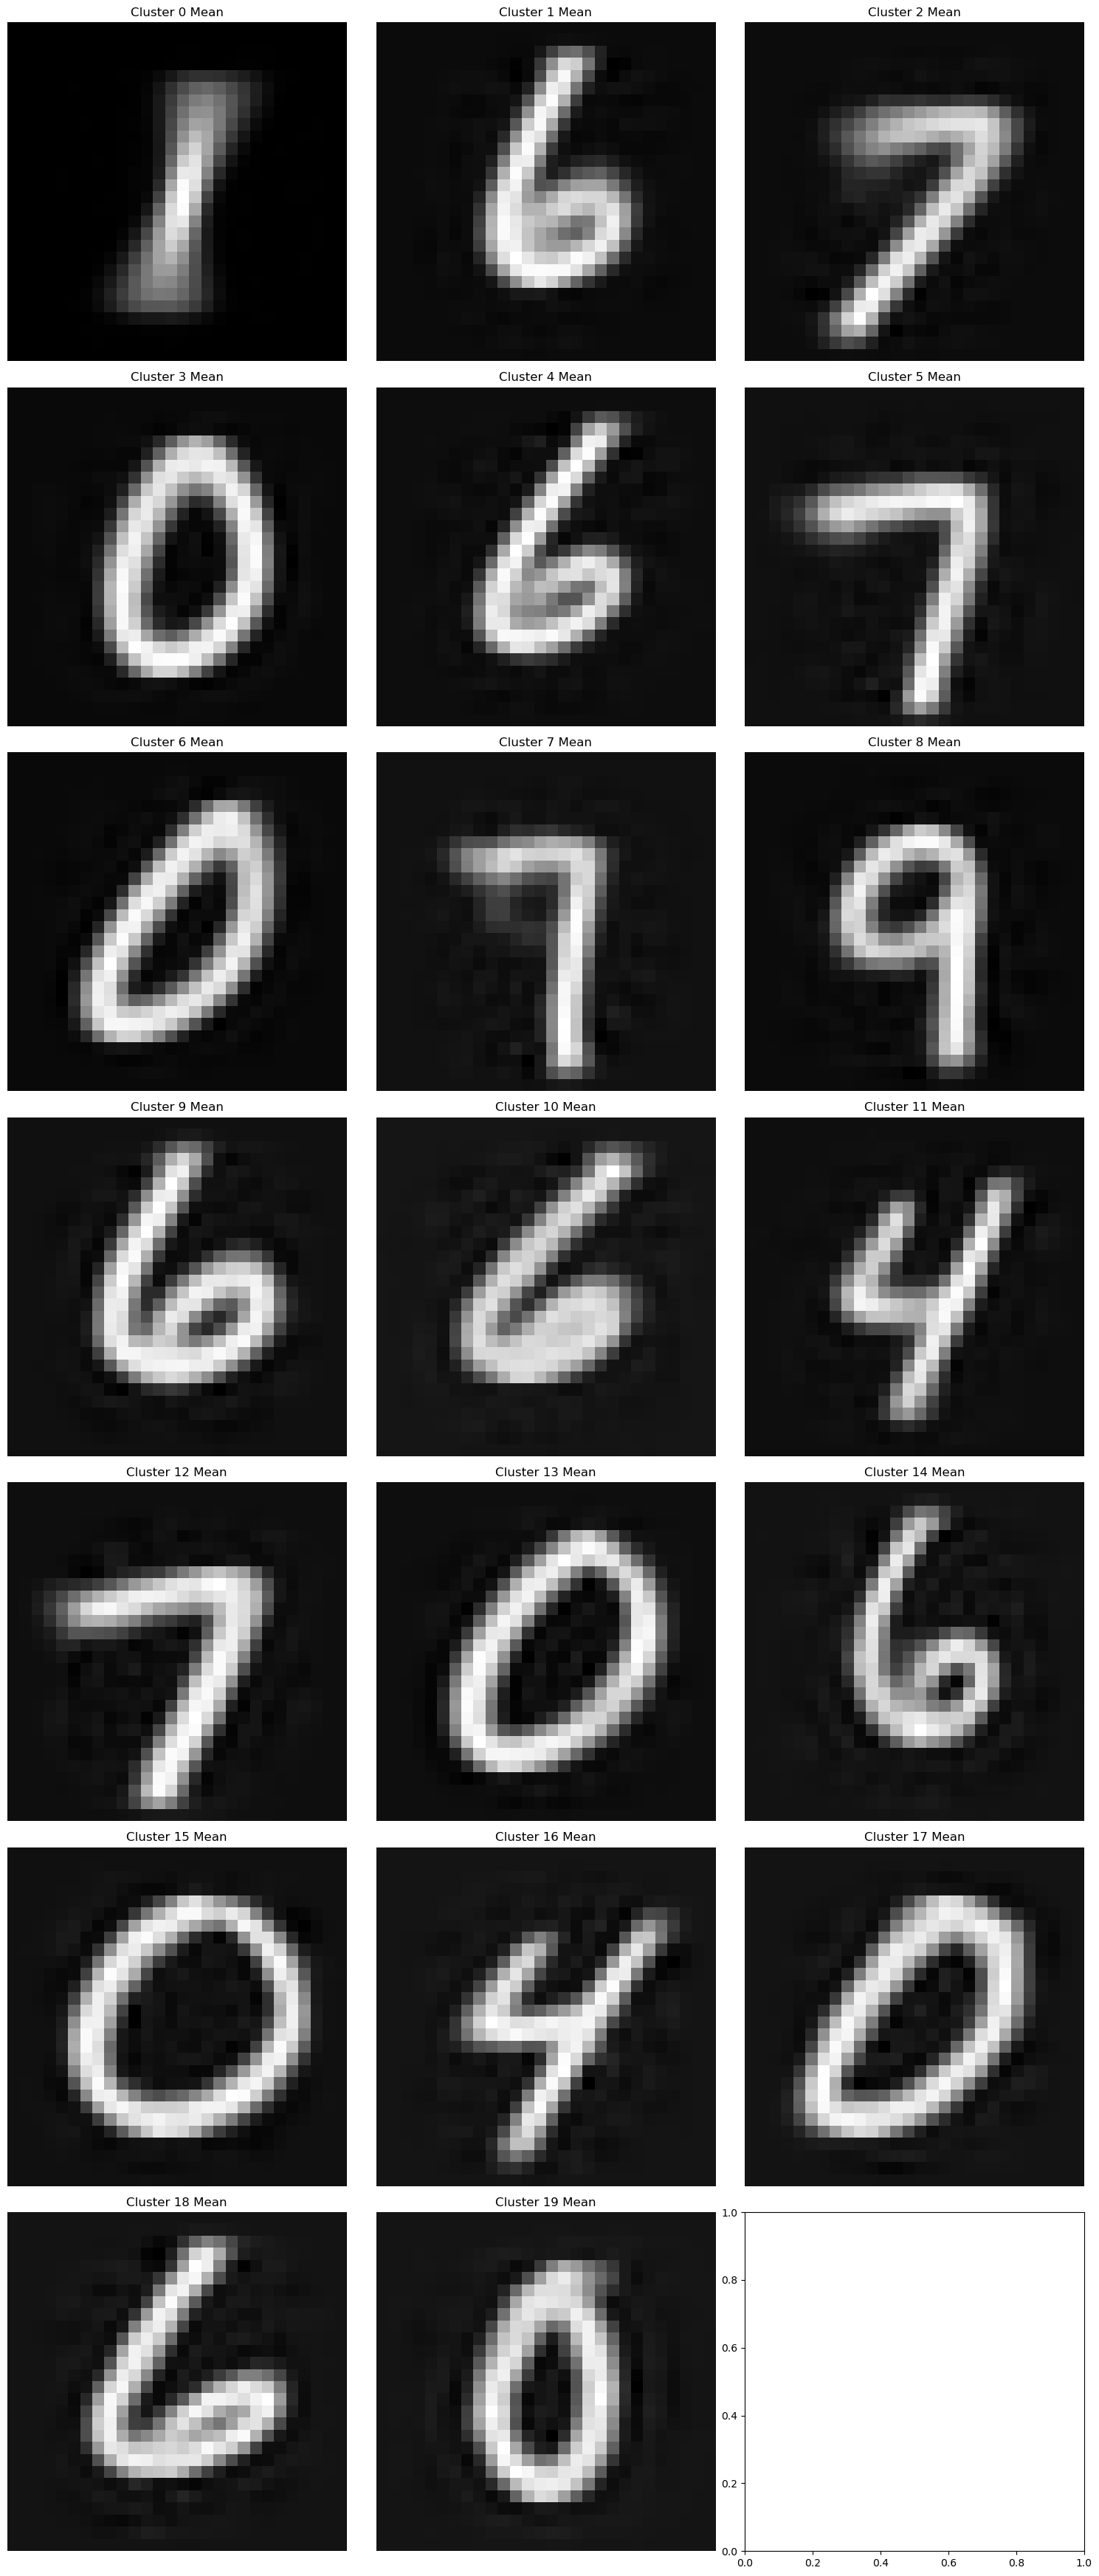

In [6]:
plot_model_means(data=data, model_name=mean_shift_evaluation.model_name, best_model_info=best, save=True)